ابتدا کتابخانه های مورد نیاز خود را ایمپورت میکنیم و دیتاست مدنظر را دریافت میکنیم. یک دیتافریم از این دیتاست میسازیم و ده رکورد اول را نشان میدهیم

In [11]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt

diabetes = datasets.load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

print(df.head(10))

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5 -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6 -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7  0.063504  0.050680 -0.001895  0.066629  0.090620  0.108914  0.022869   
8  0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9 -0.070900 -0.044642  0.039062 -0.033213 -0.012577 -0.034508 -0.024993   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0

ابتدا فیچر ها را از تارگت ها جدا میکنیم بعد داده های

train

رو از داده های

test

با استفاده از تابع

train_test_split()

جدا میکنیم

In [12]:
# seperate features (X) and target variable (Y)
X = diabetes.data
Y = diabetes.target

# split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

print("Shape of training features:", X_train.shape)
print("Shape of testing features:", X_test.shape)
print("Shape of training target variable:", Y_train.shape)
print("Shape of testing target variable:", Y_test.shape)

Shape of training features: (221, 10)
Shape of testing features: (221, 10)
Shape of training target variable: (221,)
Shape of testing target variable: (221,)


روش های 

classifier

مد نظر خود را به همراه تابع مختص به آنها در آرایه ای ذخیره و آنها را بصورت داینامیک انجام داده و دقت آنها را بررسی

و در یک جدول ذخیره میکنیم

In [13]:
classifiers = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("KNN", KNeighborsClassifier(n_neighbors=3)),
    ("MLP Classifier", MLPClassifier(alpha=1, max_iter=1000, random_state=42)),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Support Vector Classifier", SVC())
]

accuracy_table = {"Classifier": [], "Accuracy": []}

for name, clf in classifiers:
    clf.fit(X_train, Y_train)
    accuracy = clf.score(X_test, Y_test)
    accuracy_table["Classifier"].append(name)
    accuracy_table["Accuracy"].append(accuracy)
    print(f"{name} Accuracy: {accuracy}")

accuracy_df = pd.DataFrame(accuracy_table)

print("\nAccuracy Table:")
print(accuracy_df)

Decision Tree Accuracy: 0.013574660633484163
KNN Accuracy: 0.0
MLP Classifier Accuracy: 0.00904977375565611
Gaussian Naive Bayes Accuracy: 0.0
Support Vector Classifier Accuracy: 0.00904977375565611

Accuracy Table:
                  Classifier  Accuracy
0              Decision Tree  0.013575
1                        KNN  0.000000
2             MLP Classifier  0.009050
3       Gaussian Naive Bayes  0.000000
4  Support Vector Classifier  0.009050


در نهایت با توجه به دقت های بدست آمده از هر 

classifier 

هیستوگرام زیر را درست میکنیم

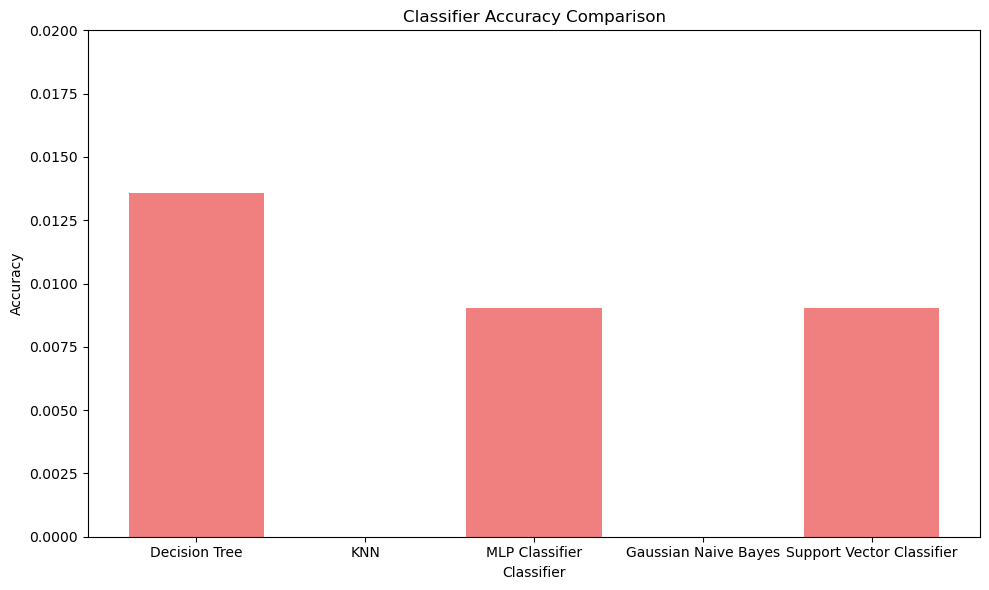

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df["Classifier"], accuracy_df["Accuracy"], color='lightcoral')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
# plt.ylim(0, 1)
plt.ylim(0, 0.02)  

plt.tight_layout()
plt.show()